<a href="https://colab.research.google.com/github/am-eric/Cousera-projects/blob/main/Naive_Bayes_Email_Spam_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align=center>Naive Bayes<h1>

---

Based on Bayes Theorem.

**Naive** : Assumes the occurence of a certain feature is independent to the occurence of other features.

**Bayes Theorem/ Law**

P(A | B) = P(B | A) * P(A) / P(B)



Where:
- P(A | B) is the posterior probability of class A given features B.
- P(B | A) is the likelihood of features B given class A.
- P(A) is the prior probability of class A.
- P(B) is the probability of features B.



Now lets predict if an Email is Span or not

---

### Step 1: Load the Dataset

In [1]:
import pandas as pd


In [2]:
# Read the data from a CSV file
df = pd.read_csv("spamsms-1.csv", encoding="iso-8859-1")
df.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df.isna()

,type,text
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [5]:
#remove duplicates if any
df = df.drop_duplicates()

In [6]:
df.shape

(5169, 2)

###Step 2: Label encoder to change text to numerals

In [7]:
# label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['type'])

LabelEncoder()

In [8]:
df['type'] = le.transform(df['type'])

In [9]:
df['type']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: type, Length: 5169, dtype: int64

 ham = 0

 spam = 1

 ---

Count the type labels and plot

In [17]:
type_count = df.type.value_counts()
type_count

0    4516
1     653
Name: type, dtype: int64

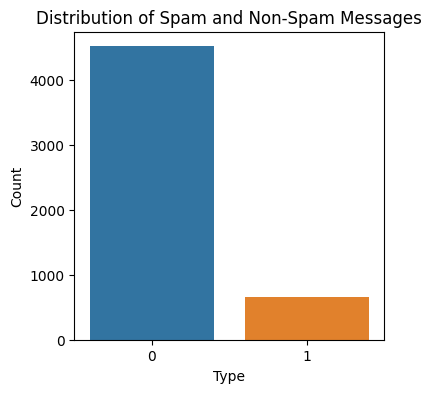

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4,4))
ax = sns.countplot(data=df, x='type')

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Spam and Non-Spam Messages')
plt.show()



In [19]:
print('There are {} spam messages.'.format(len(df[df['type'] == 1])))

There are 653 spam messages.


In [22]:
print('There are {} non-spam messages.'.format(len(df[df['type'] == 0])))

There are 4516 non-spam messages.
